[02-06 14:18:12][INFO] Se ajustarán 3 parámetros.
[02-06 14:18:12][INFO] 
[[ 214.18604567   61.6479       20.           24.7861    ]
 [   0.          -17.57011186  -13.53914045    9.4986119 ]
 [   0.         -112.51779515  -83.54300563   78.89917291]]
[02-06 14:18:12][INFO] 
[[214.18604567  61.6479      20.          24.7861    ]
 [  0.         -17.57011186 -13.53914045   9.4986119 ]
 [  0.           0.           3.16072415  18.07071169]]


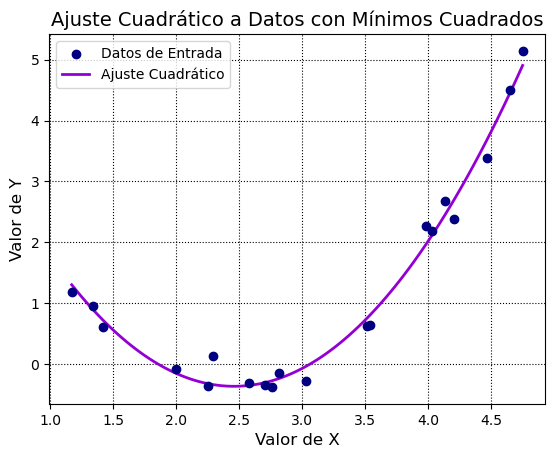

El error relativo cuadrático es 0.3787
[02-06 14:18:12][INFO] Se ajustarán 2 parámetros.
[02-06 14:18:12][INFO] 
[[61.6479     20.         24.7861    ]
 [ 0.         -7.83899109 16.56283549]]


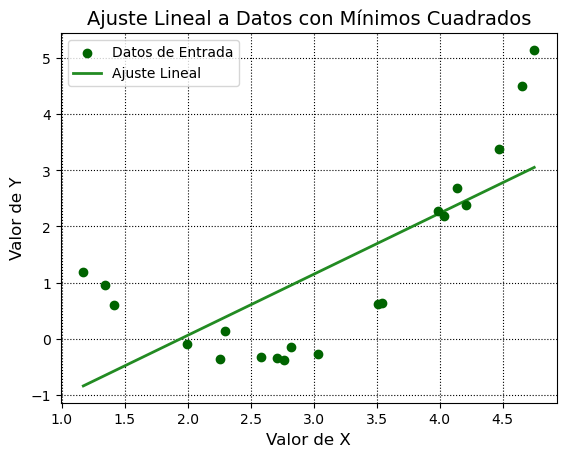

El error relativo lineal es 1.8949


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src import ajustar_min_cuadrados

# Funciones para calcular las derivadas parciales para el sistema cuadrático
def derivada_parcial_2(xs, ys):
    # Calcula los coeficientes para la segunda derivada parcial
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(yi * xi**2 for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def derivada_parcial_1(xs, ys):
    # Calcula los coeficientes para la primera derivada parcial
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(yi * xi for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def derivada_parcial_0(xs, ys):
    # Calcula los coeficientes para la derivada parcial nula
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

# Función cuadrática que calcula los valores ajustados
def ajuste_cuadratico(x, parametros):
    a2, a1, a0 = parametros
    return a2 * x**2 + a1 * x + a0

# Datos de entrada (valores de x e y)
xs = [
    1.1715, 1.3396, 1.4163, 1.9962, 2.2523, 2.2947, 2.5793, 2.7054, 2.7635,
    2.8200, 3.0317, 3.5111, 3.5393, 3.9829, 4.0323, 4.1353, 4.2084, 4.4683,
    4.6509, 4.7489
]
ys = [
    1.1902, 0.9564, 0.6078, -0.0856, -0.3550, 0.1355, -0.3171, -0.3425, -0.3758,
    -0.1518, -0.2767, 0.6251, 0.6447, 2.2733, 2.1789, 2.6781, 2.3818, 3.3786,
    4.4971, 5.1431
]

# Realizar el ajuste cuadrático usando los métodos de derivadas parciales
parametros_cuadraticos = ajustar_min_cuadrados(xs, ys, gradiente=[derivada_parcial_2, derivada_parcial_1, derivada_parcial_0])

# Generar los valores de x para graficar la función ajustada
rango_x = np.linspace(min(xs), max(xs), 100)
ajuste_y = [ajuste_cuadratico(xi, parametros_cuadraticos) for xi in rango_x]

# Visualización del ajuste cuadrático
plt.scatter(xs, ys, color='navy', label="Datos de Entrada", zorder=5)
plt.plot(rango_x, ajuste_y, color='darkviolet', label="Ajuste Cuadrático", linewidth=2)
plt.title("Ajuste Cuadrático a Datos con Mínimos Cuadrados", fontsize=14)
plt.xlabel("Valor de X", fontsize=12)
plt.ylabel("Valor de Y", fontsize=12)
plt.grid(True, linestyle=':', color='black')
plt.legend()
plt.show()

# Cálculo del error cuadrático relativo
error_cuadratico = np.mean([abs(ajuste_cuadratico(xi, parametros_cuadraticos) - real_y) / abs(real_y) for xi, real_y in zip(xs, ys)])
print(f"El error relativo cuadrático es {error_cuadratico:.4f}")

# Funciones para derivadas parciales del ajuste lineal
def derivada_lineal_1(xs, ys):
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)

def derivada_lineal_0(xs, ys):
    c_1 = sum(xi * xi for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c_1, c_0, c_ind)

# Función lineal para el ajuste
def ajuste_lineal(x, parametros):
    a1, a0 = parametros
    return a1 * x + a0

# Realizar el ajuste lineal
parametros_lineales = ajustar_min_cuadrados(xs, ys, gradiente=[derivada_lineal_0, derivada_lineal_1])

# Generar los valores de y para el ajuste lineal
ajuste_y_lineal = [ajuste_lineal(xi, parametros_lineales) for xi in rango_x]

# Visualización del ajuste lineal
plt.scatter(xs, ys, color='darkgreen', label="Datos de Entrada", zorder=5)
plt.plot(rango_x, ajuste_y_lineal, color='forestgreen', label="Ajuste Lineal", linewidth=2)
plt.title("Ajuste Lineal a Datos con Mínimos Cuadrados", fontsize=14)
plt.xlabel("Valor de X", fontsize=12)
plt.ylabel("Valor de Y", fontsize=12)
plt.grid(True, linestyle=':', color='black')
plt.legend()
plt.show()

# Cálculo del error cuadrático relativo para el ajuste lineal
error_lineal = np.mean([abs(ajuste_lineal(xi, parametros_lineales) - real_y) / abs(real_y) for xi, real_y in zip(xs, ys)])
print(f"El error relativo lineal es {error_lineal:.4f}")


[02-06 13:33:03][INFO] 2025-02-06 13:33:03.631581
[02-06 13:33:03][INFO] Vid| 2025-02-06 13:33:03.920929
[02-06 13:33:03][INFO] 2025-02-06 13:33:03.920929
[02-06 13:33:03][INFO] Vid| 2025-02-06 13:33:03.920929
